In [1]:
import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid',palette='deep')

import warnings

warnings.filterwarnings('ignore')

import os

import mysql.connector

from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,recall_score,f1_score

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

custom_cmap=sns.color_palette("viridis")

from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_learning_curves

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

In [2]:
connection = mysql.connector.connect(
    
    host='18.136.157.135',
    
    user='dm_team2',  
    
    password='DM!$Team&27@9!20!',
    
    database='project_sales'  
)

In [3]:
db_tables=pd.read_sql_query('show tables',connection)

print(db_tables)

  Tables_in_project_sales
0                    data


In [4]:
host='18.136.157.135',

user='dm_team2',  

password='DM!$Team&27@9!20!',

database='project_sales'

In [5]:
df = pd.read_sql_query("select * from data",connection)

In [6]:
df.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [7]:
df.shape

(7422, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [9]:
df.nunique()

Created          6752
Product_ID         30
Source             26
Mobile            487
EMAIL             883
Sales_Agent        13
Location           18
Delivery_Mode       5
Status             11
dtype: int64

In [10]:
df['Status'].value_counts() 

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [11]:
df['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [12]:
df['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: count, dtype: int64

In [13]:
df['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [14]:
df['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [15]:
data=df.copy()

In [16]:
df.drop(columns=['EMAIL','Mobile'],inplace=True)

In [17]:
df.head(2)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,Sales-Agent-10,,Mode-5,Open


In [18]:
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')

df['day']=df['Created'].dt.day

df['month']=df['Created'].dt.month

df['hour']=df['Created'].dt.hour

df['date']=df['Created'].dt.date

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [19]:
df.head(2)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,14,11,10,2018-11-14
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,2018-11-14


In [20]:
df.drop(columns=['Created'],inplace=True)

In [21]:
df.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,10,2018-11-14
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,2018-11-14


In [22]:
num_var=df.describe(include=None)

num_var

,day,month,hour,date
count,7422.000000,7422.000000,7422.000000,7422
mean,15.647939,7.499461,13.332794,2018-07-31 07:39:02.764753152
min,1.000000,4.000000,0.000000,2018-04-28 00:00:00
25%,8.000000,6.000000,11.000000,2018-06-12 00:00:00
50%,15.000000,7.000000,13.000000,2018-07-30 00:00:00
75%,23.000000,9.000000,16.000000,2018-09-18 00:00:00
max,31.000000,11.000000,23.000000,2018-11-14 00:00:00
std,9.040559,1.877802,4.055603,NaN


In [23]:
cat_var=df.describe(include='object')

cat_var

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422
unique,30,26,13,18,5,11
top,18,Call,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,1711,2547,1500,2500,2975,1536


In [24]:
df.isna().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
day              0
month            0
hour             0
date             0
dtype: int64

In [25]:
df.duplicated().sum()

189

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.replace('',np.nan,inplace=True)

df.dropna(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)

df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,High Potential,13,11,18,2018-11-13
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential,13,11,18,2018-11-13
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,High Potential,13,11,17,2018-11-13
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential,13,11,16,2018-11-13
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential,13,11,16,2018-11-13


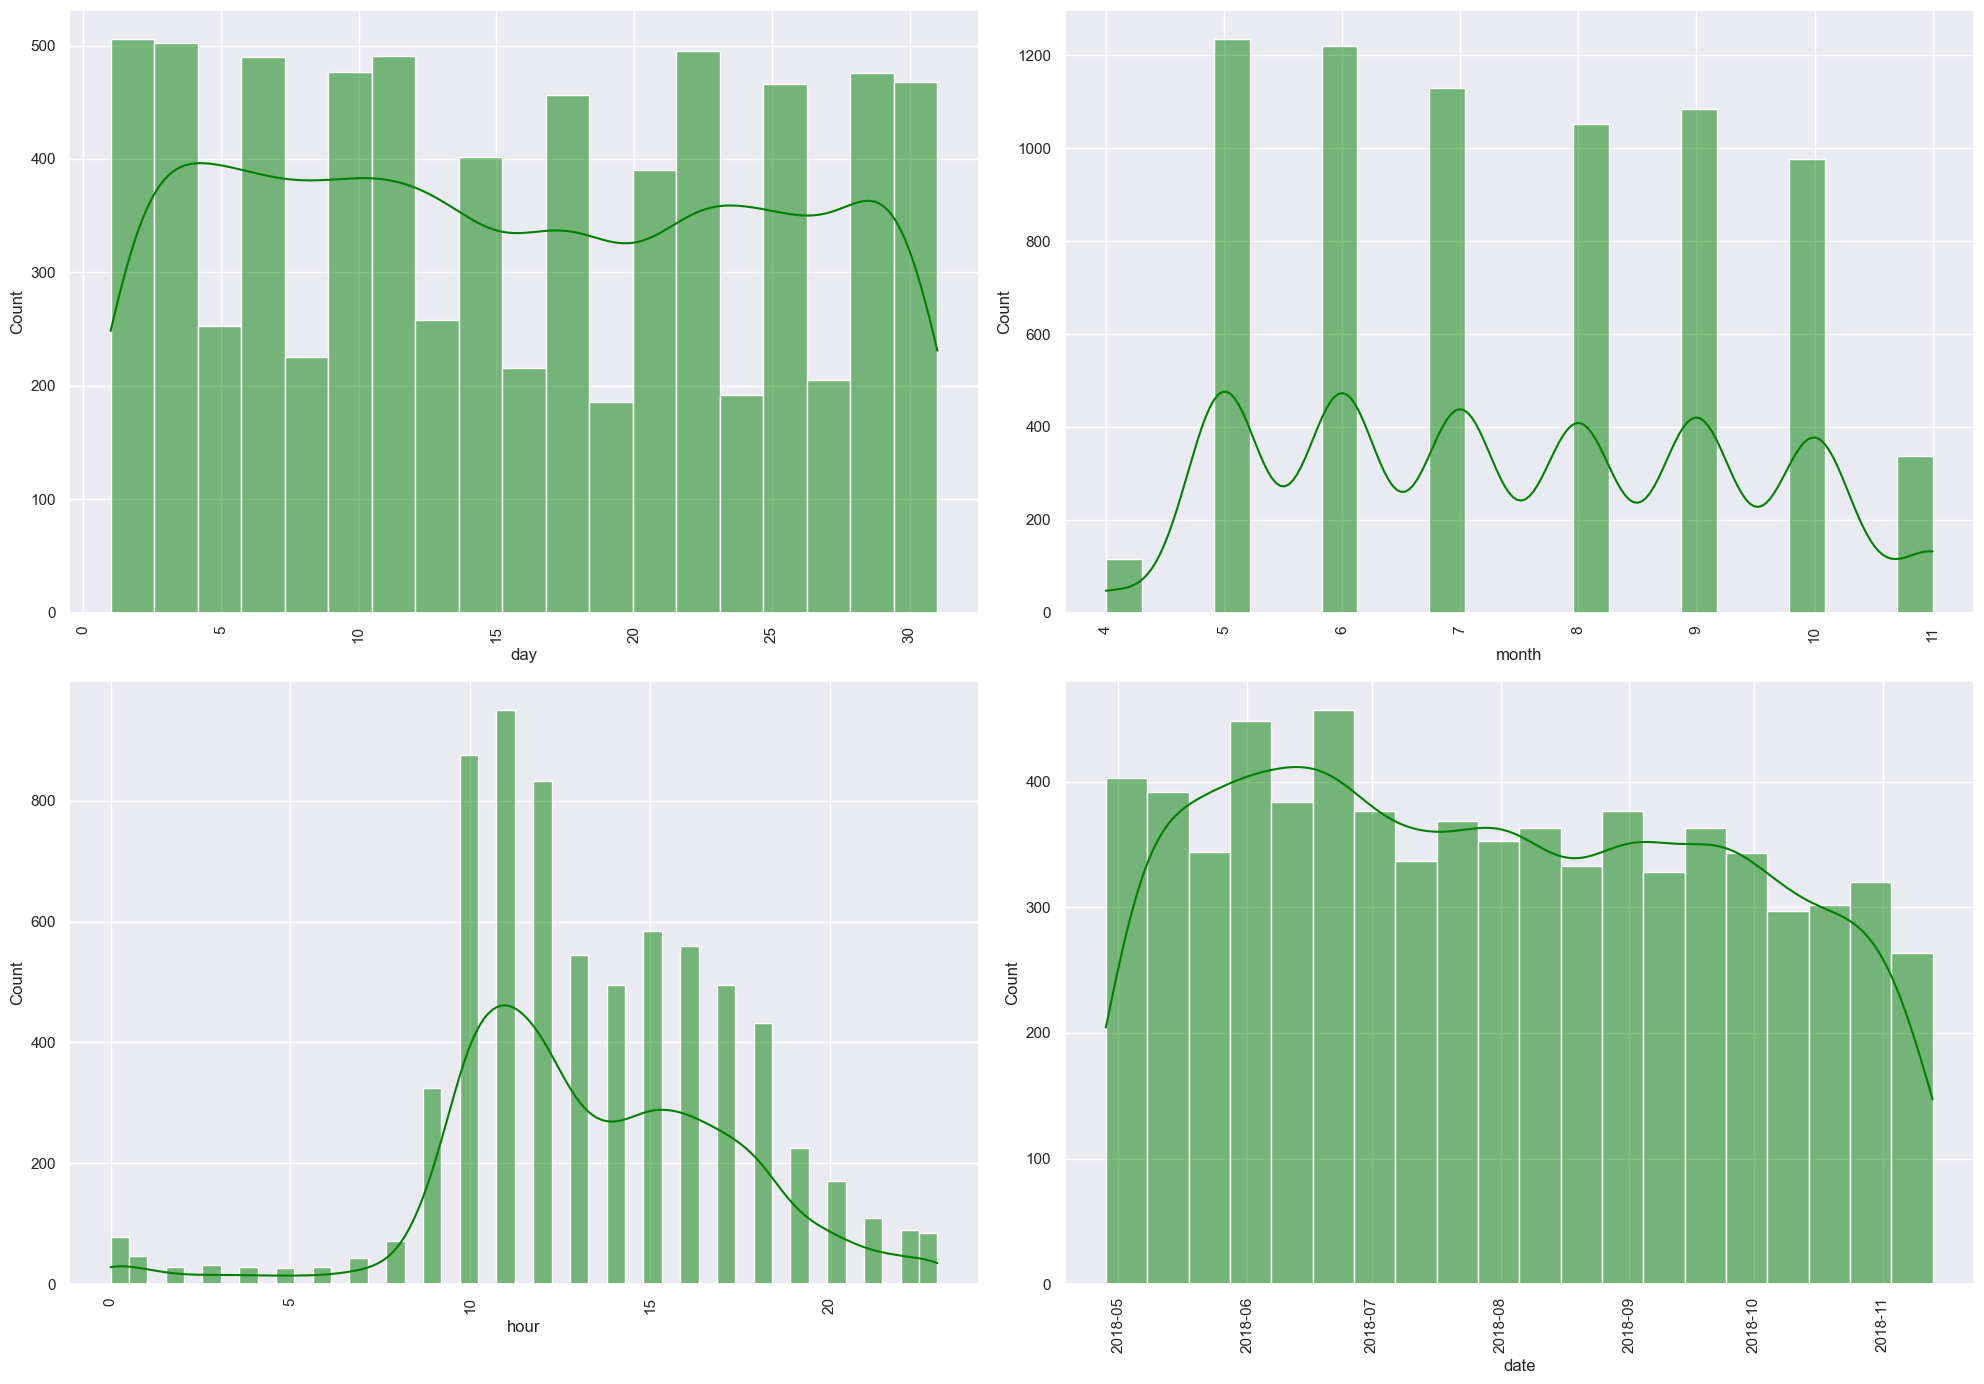

In [30]:
plt.figure(figsize=(20,14))

plotnumber=1

for i in num_var:
    
    if plotnumber<=4:
        
        plt.subplot(2,2,plotnumber)

        sns.histplot(df[i],kde=True,color='green')

        plt.xlabel(i)

        plt.xticks(rotation=90)

        # plt.legend()
    
    plotnumber+=1
    
plt.tight_layout()

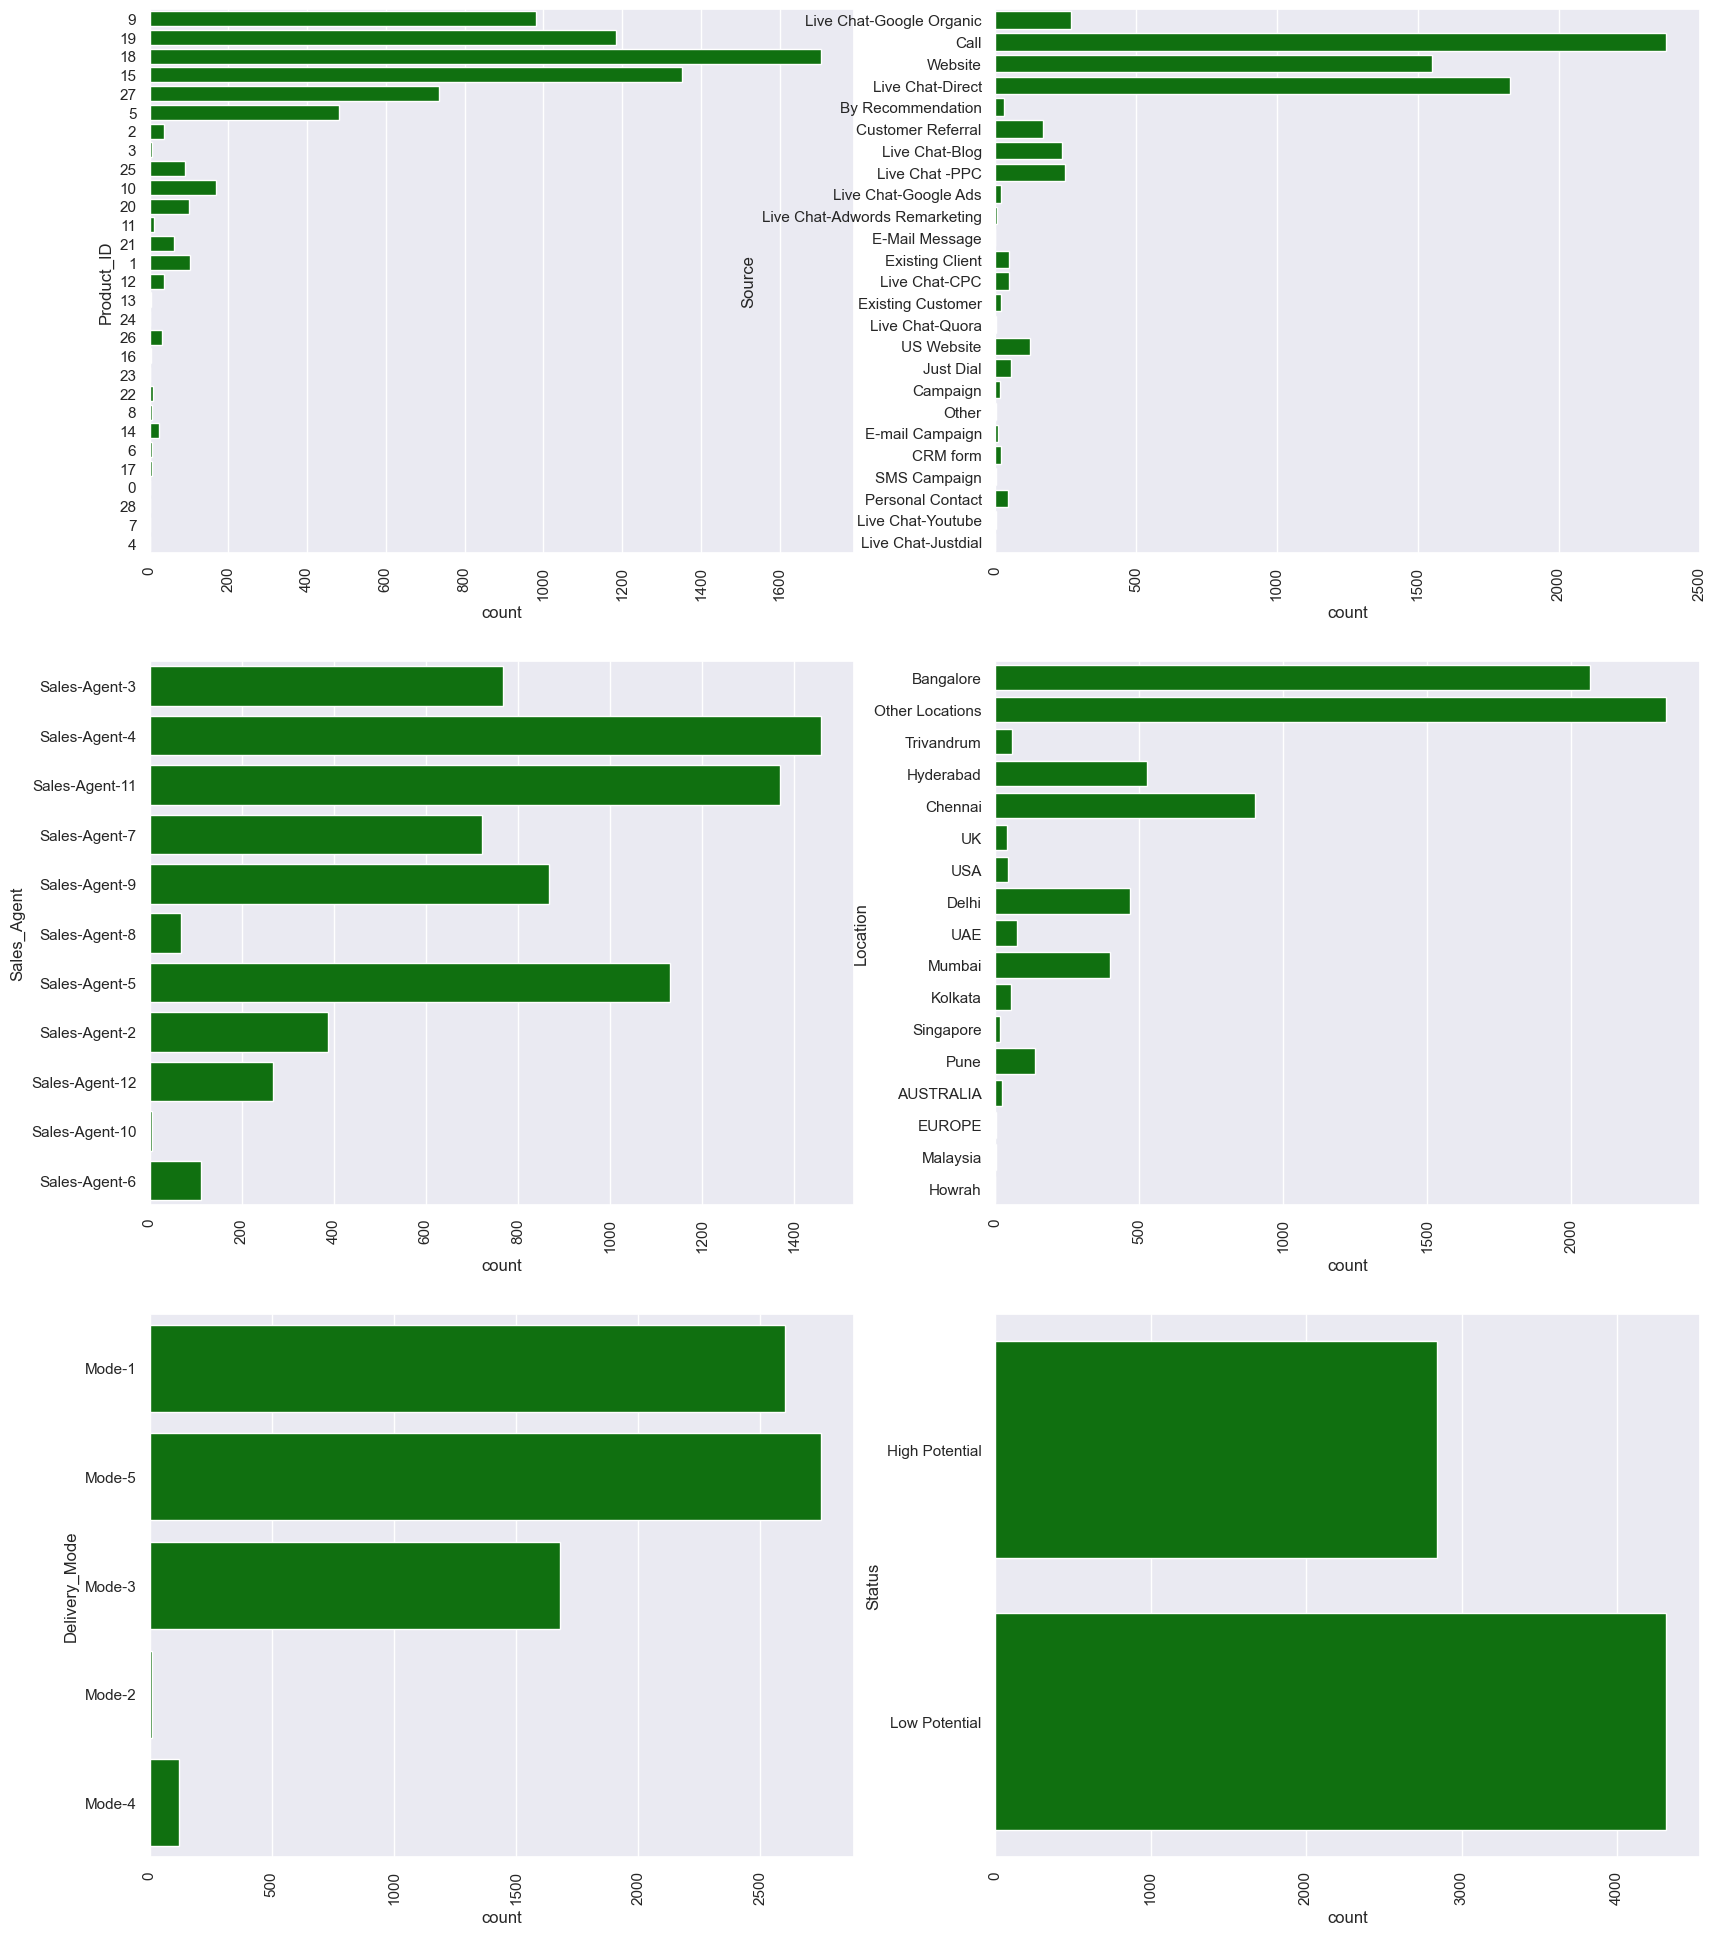

In [31]:
plt.figure(figsize=(20,24))

plotnumber=1

for i in cat_var:

    # plt.figure(figsize=(20,30))
    
    if plotnumber<=6:
        
        plt.subplot(3,2,plotnumber)

        sns.countplot(y=df[i],data=df,color='green')

        plt.ylabel(i)
    
        plt.xticks(rotation=90)
    
    plotnumber+=1

plt.show()

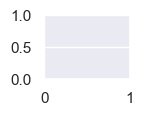

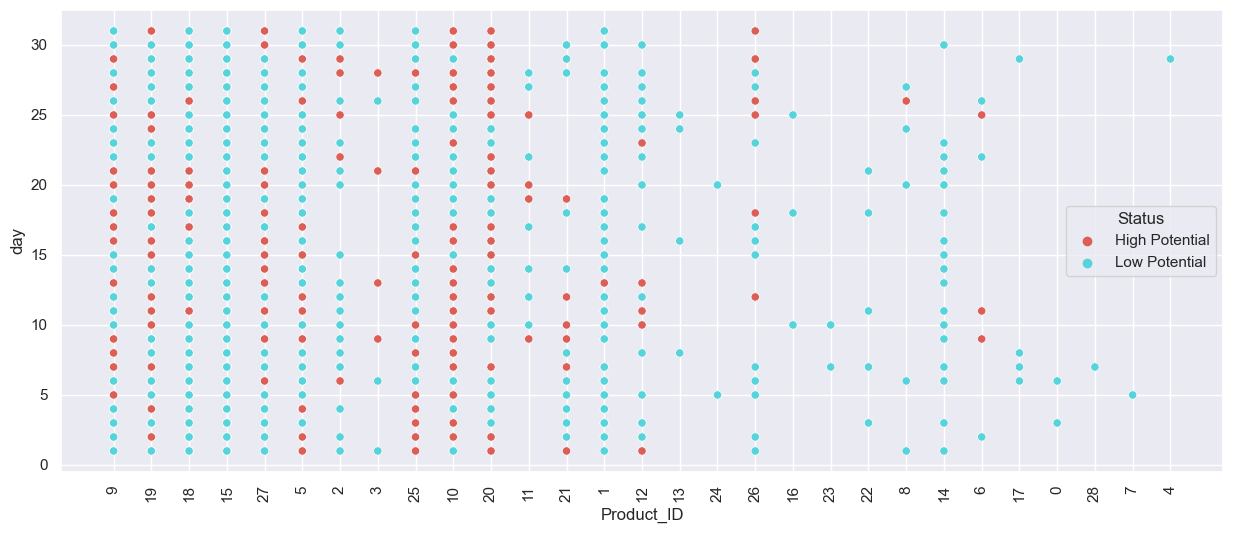

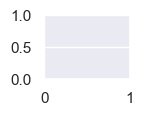

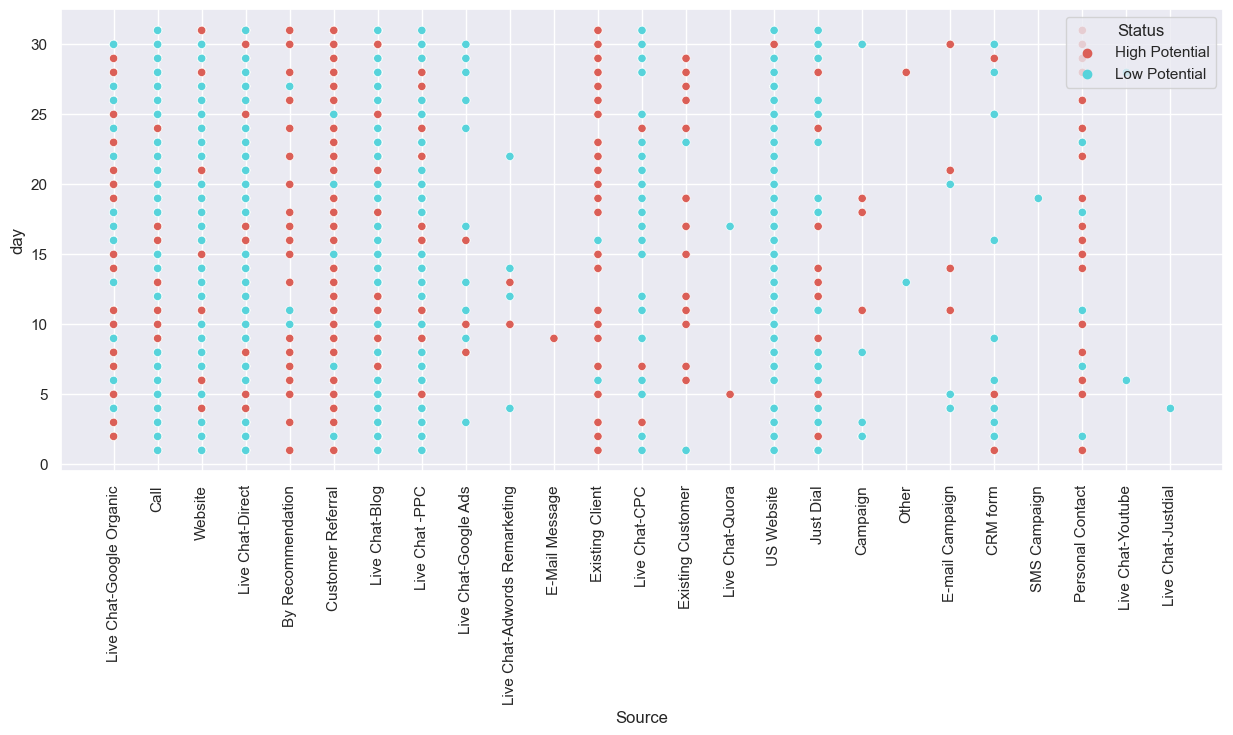

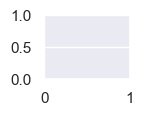

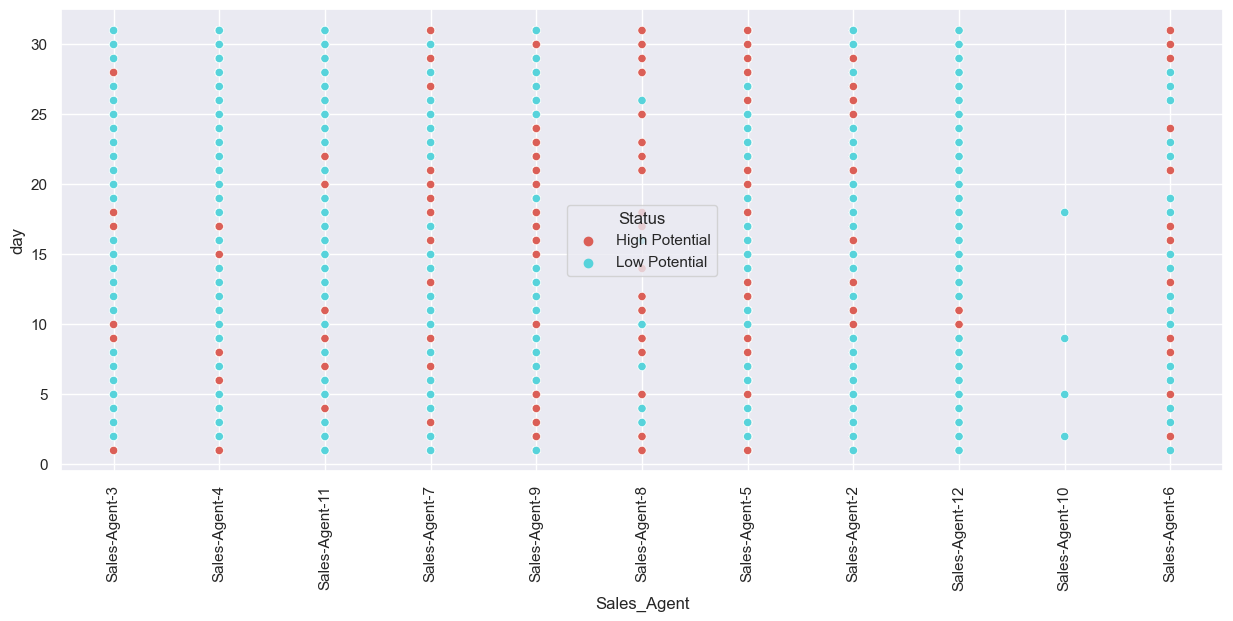

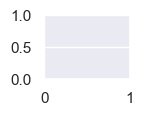

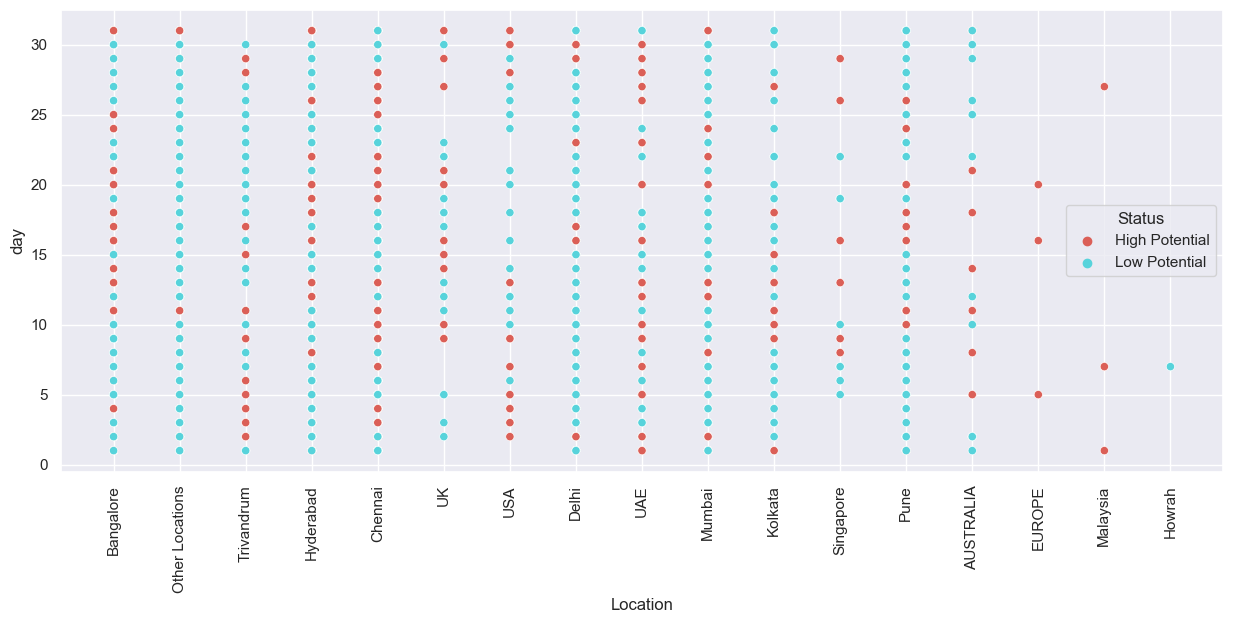

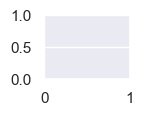

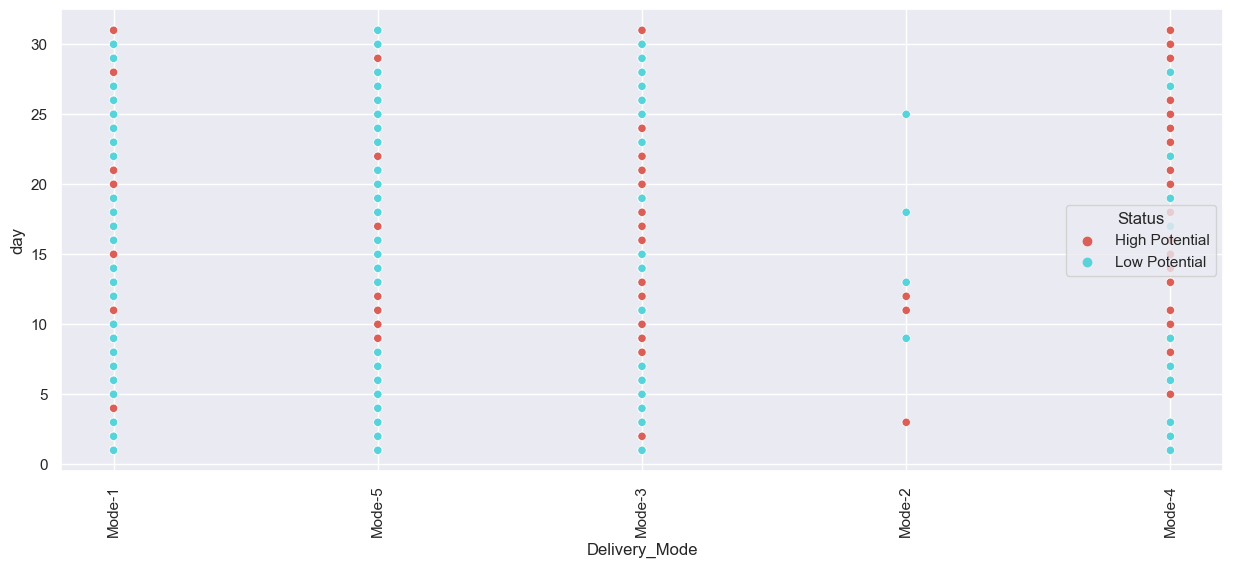

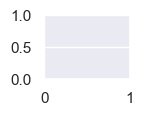

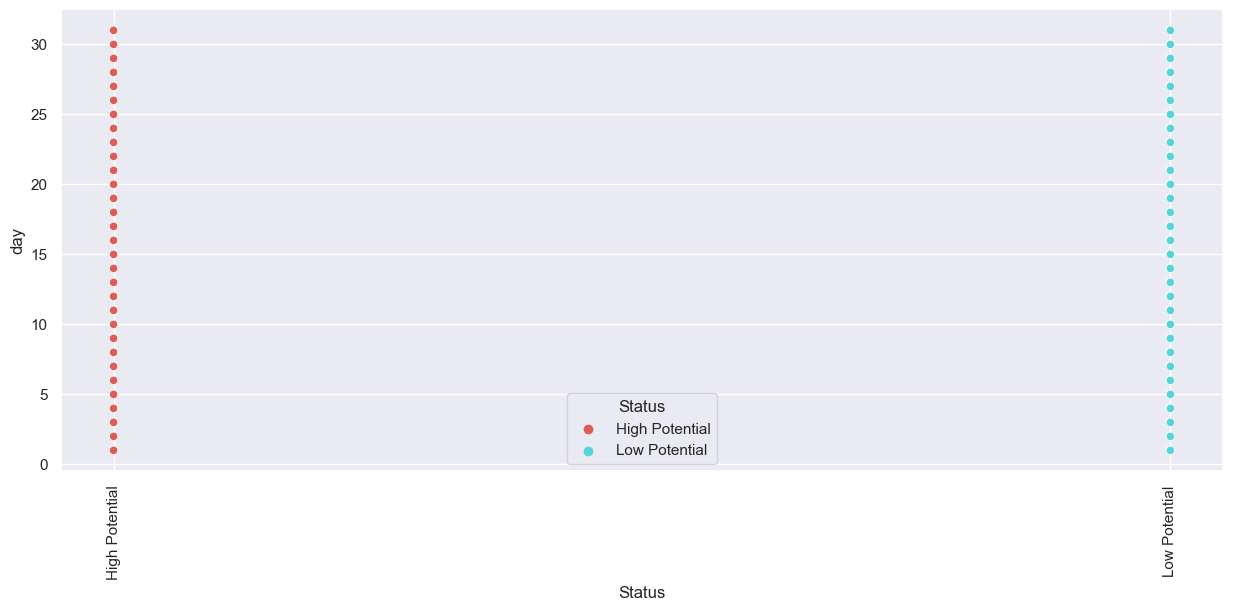

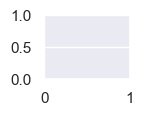

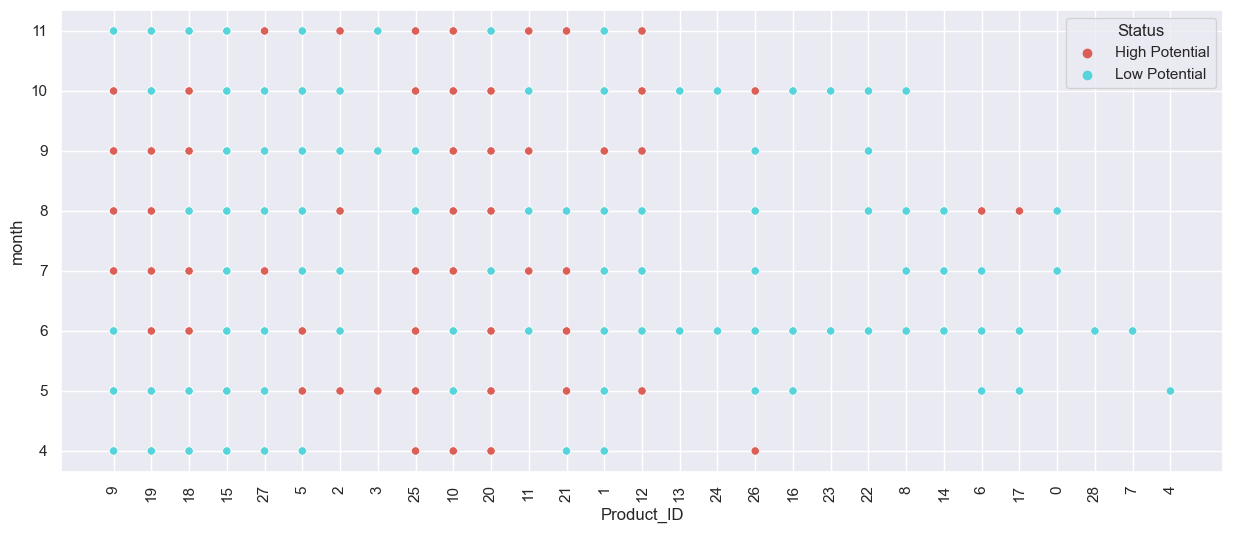

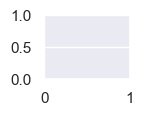

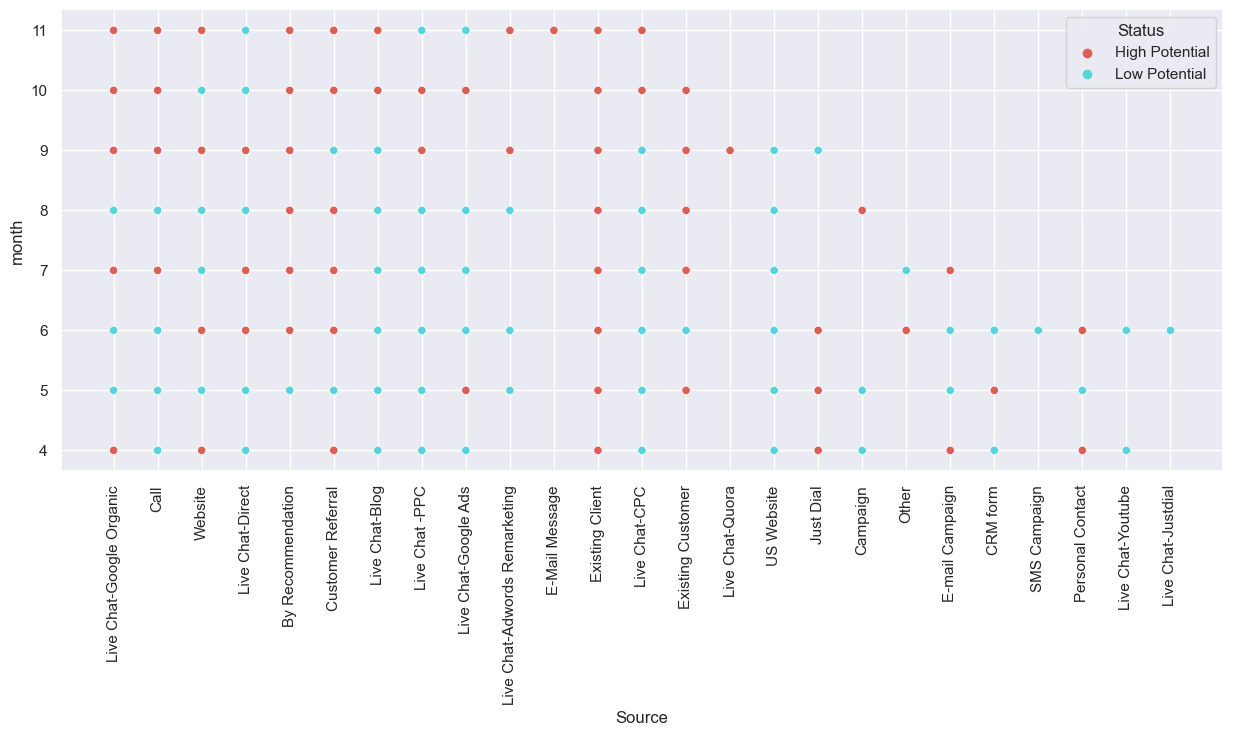

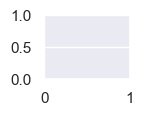

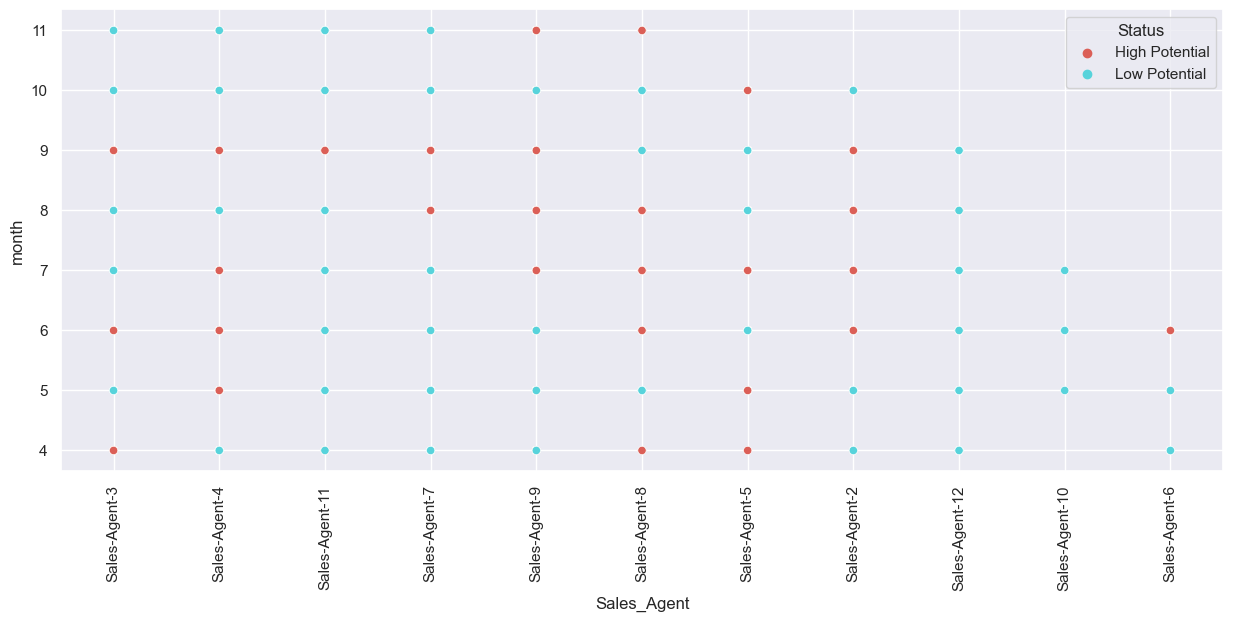

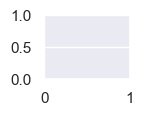

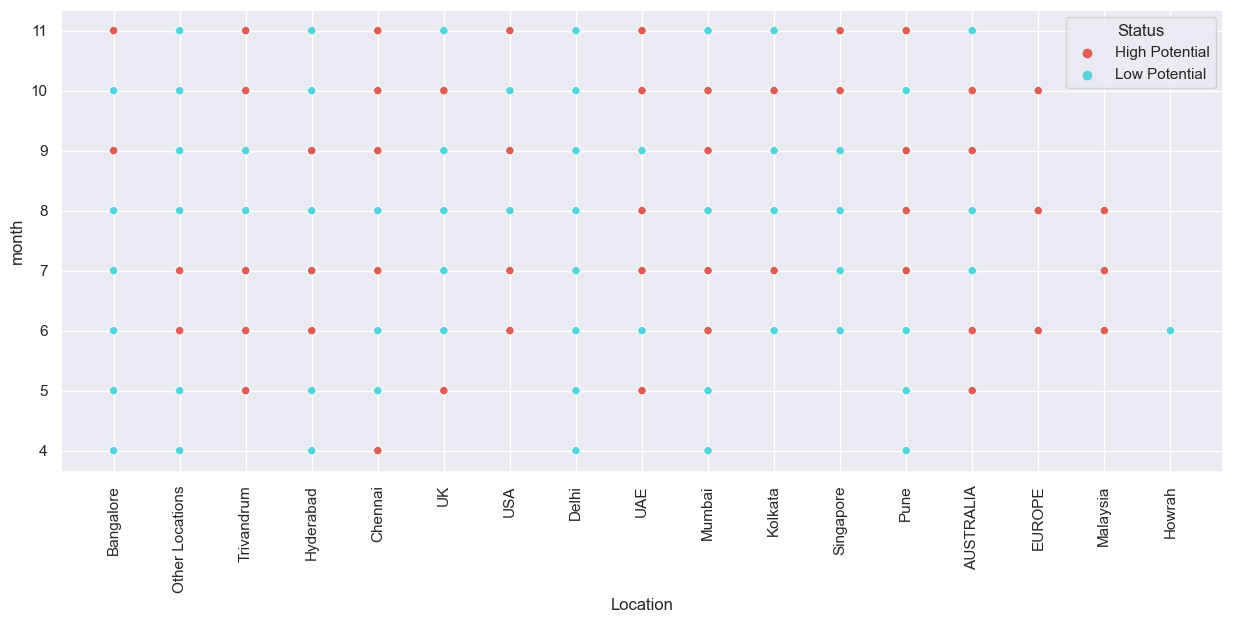

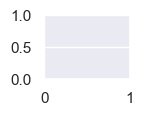

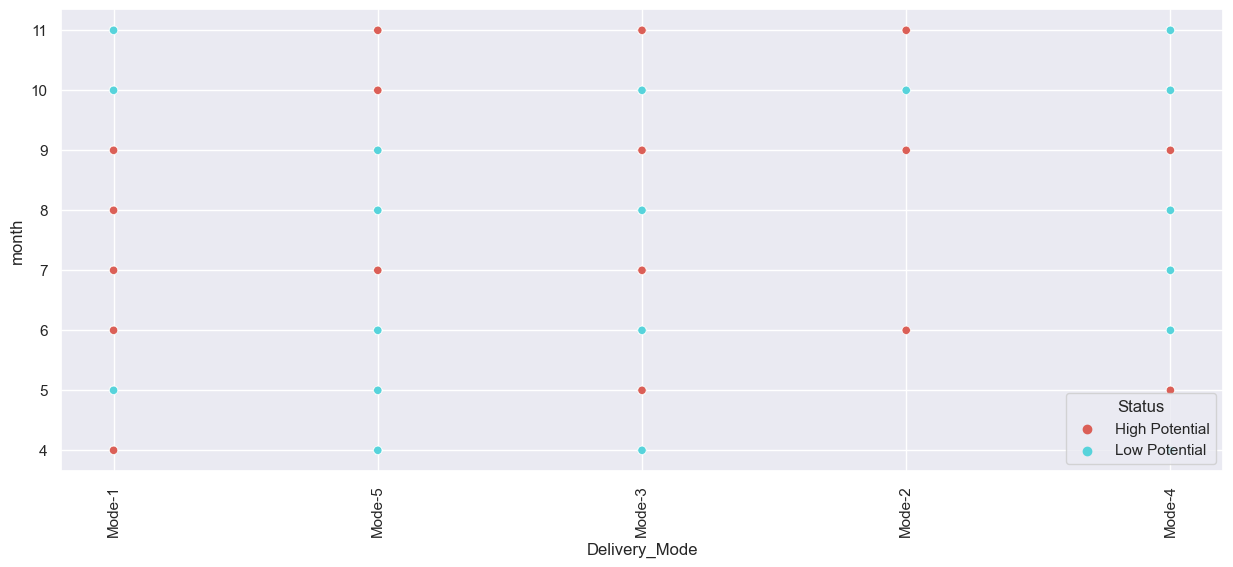

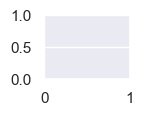

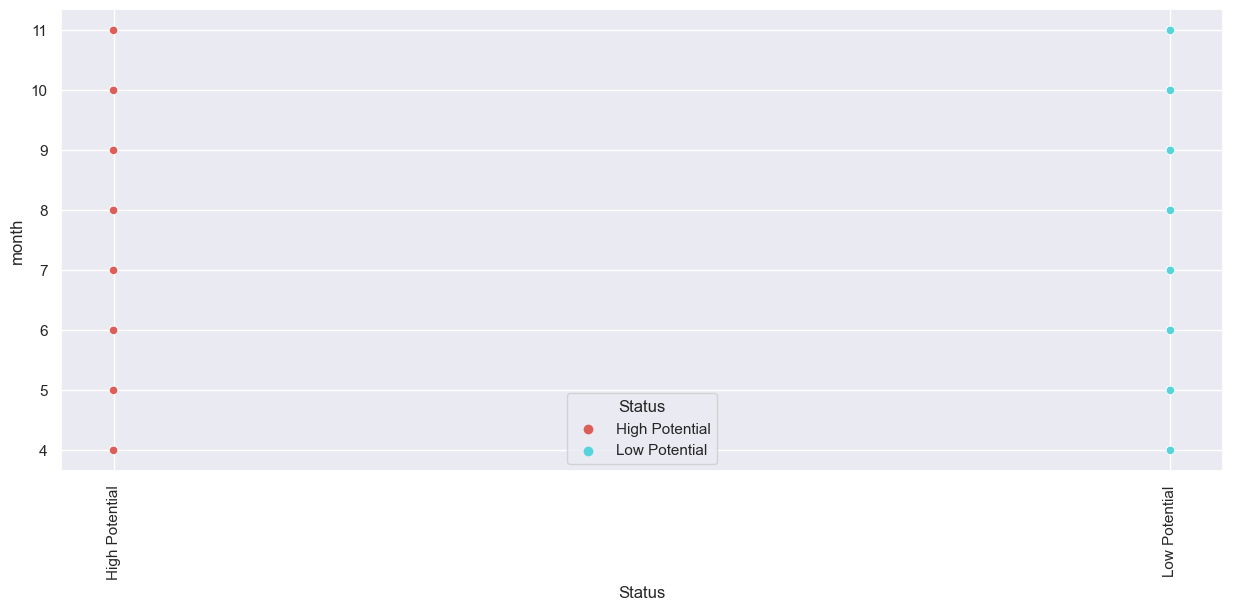

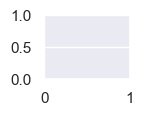

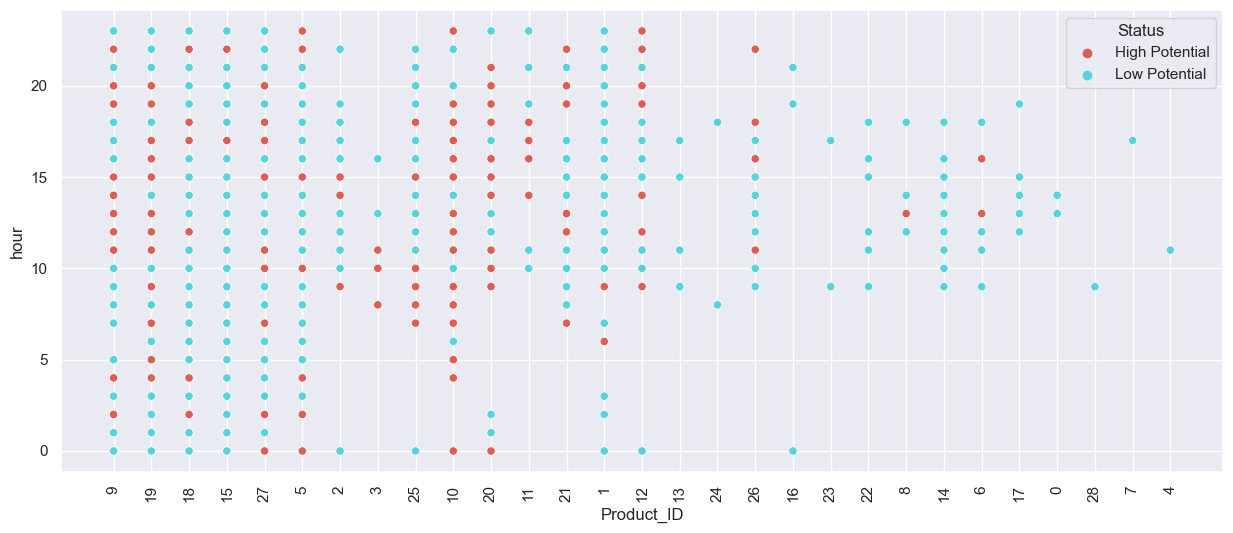

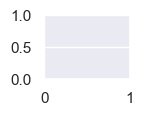

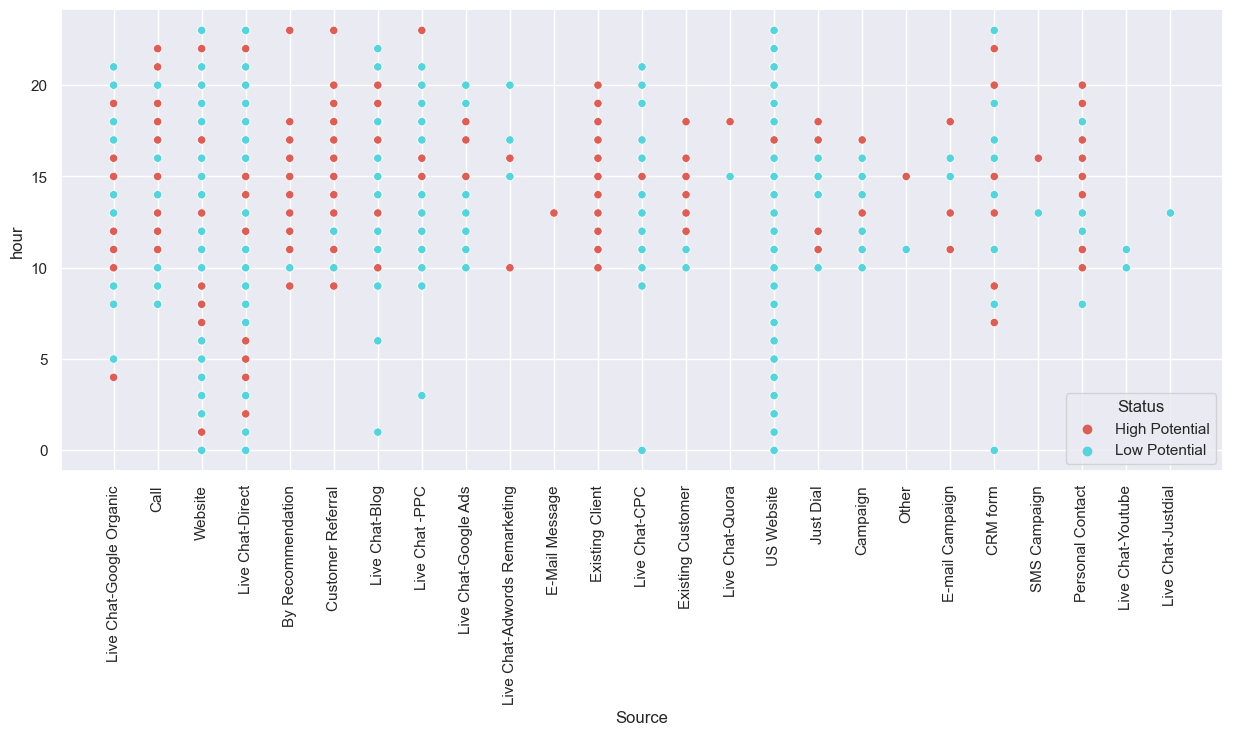

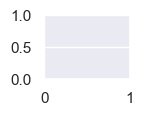

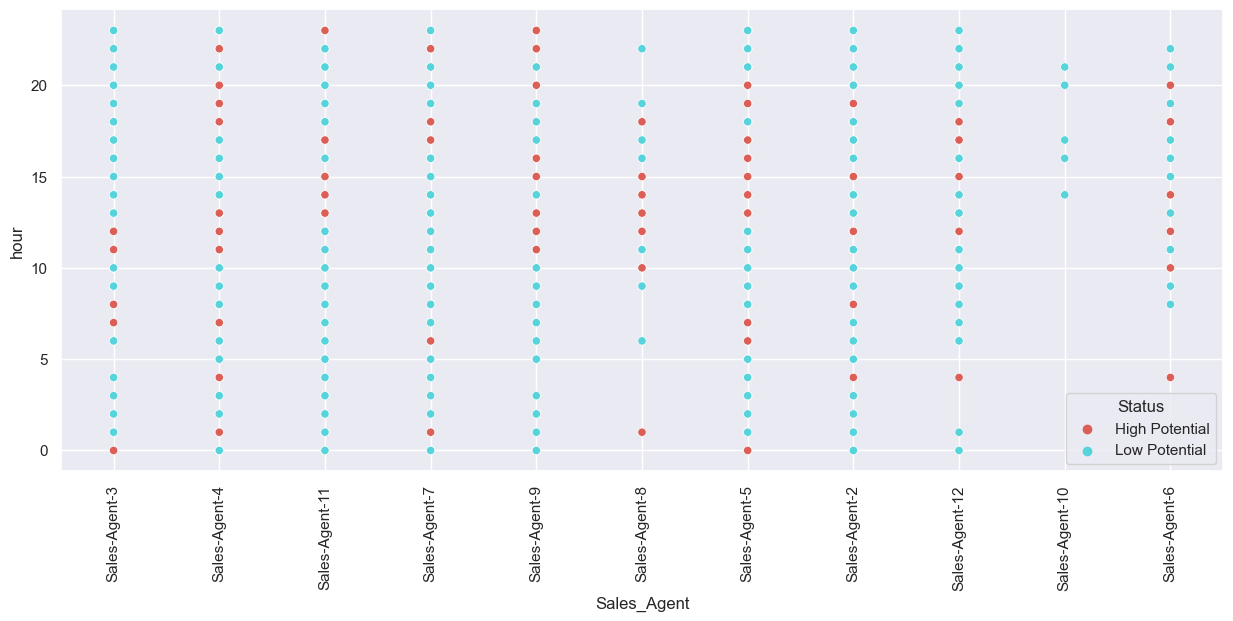

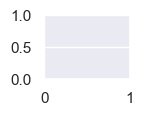

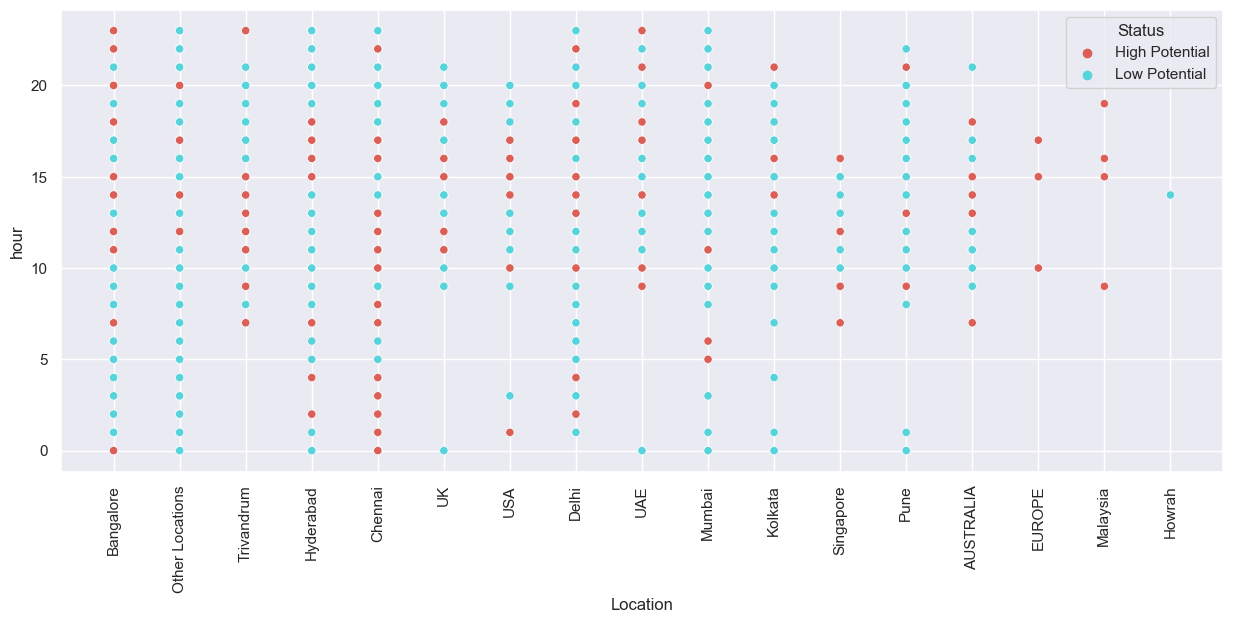

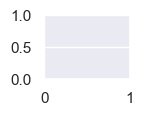

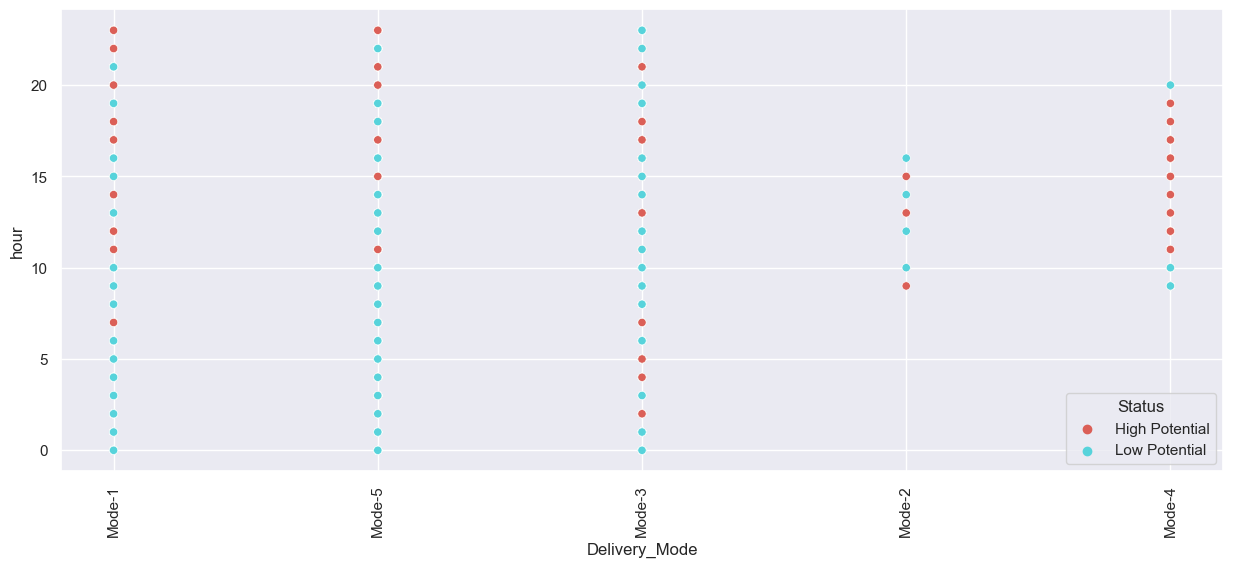

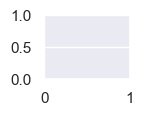

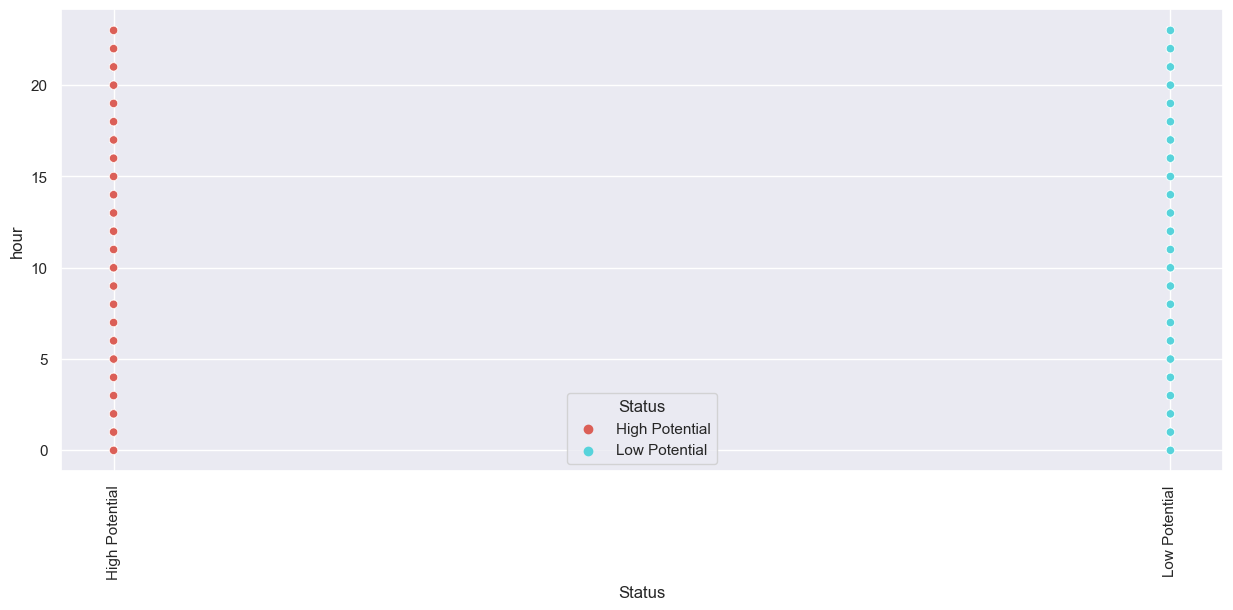

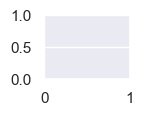

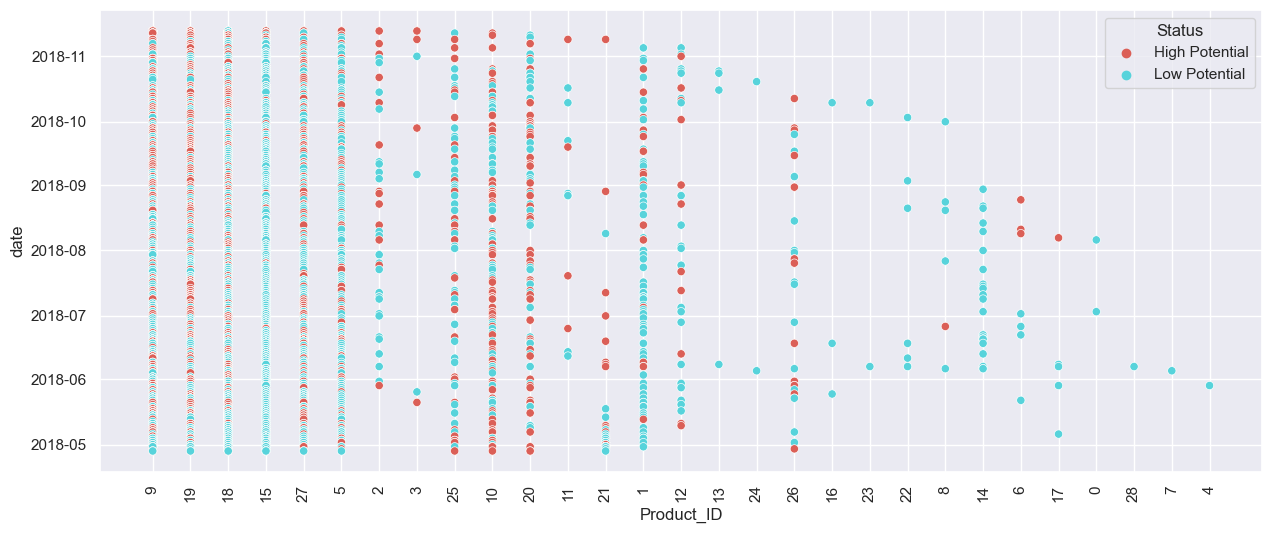

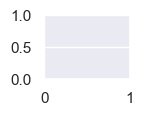

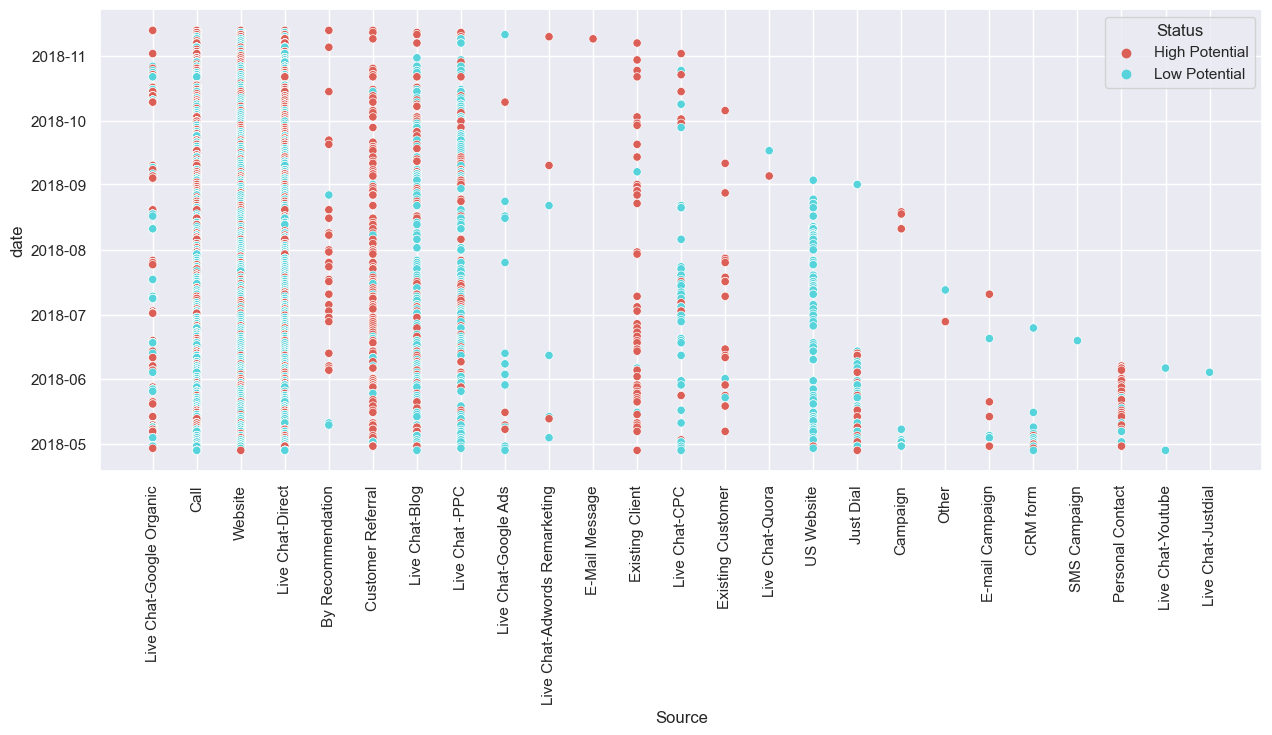

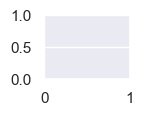

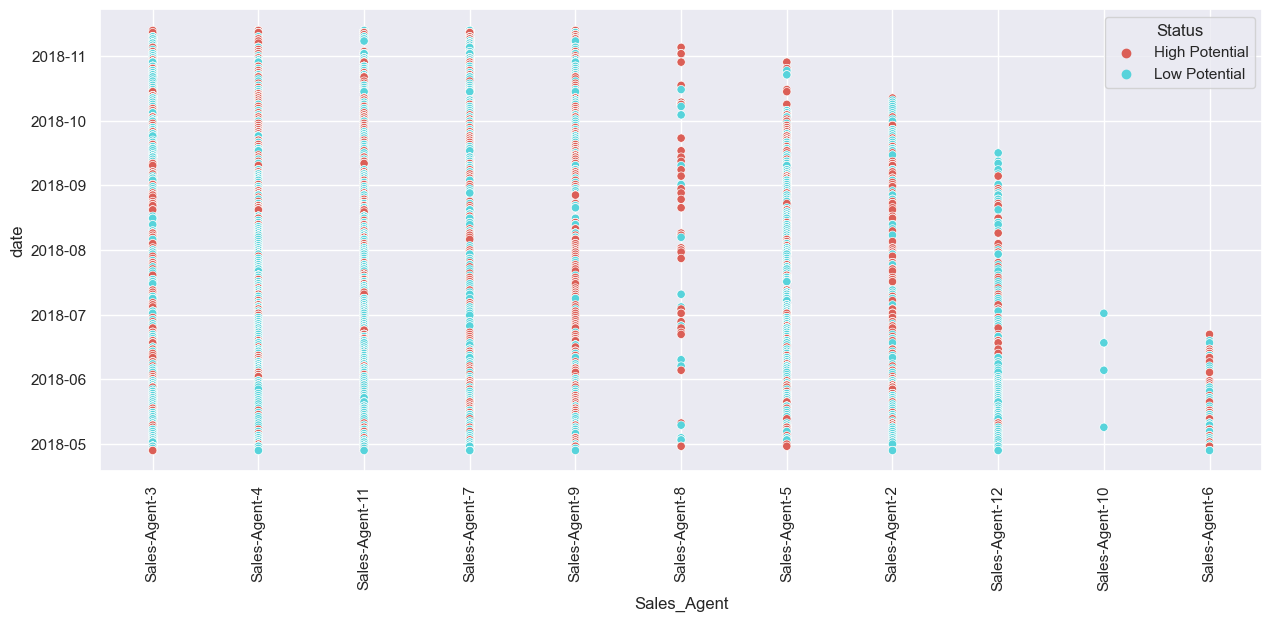

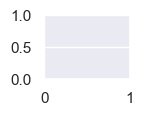

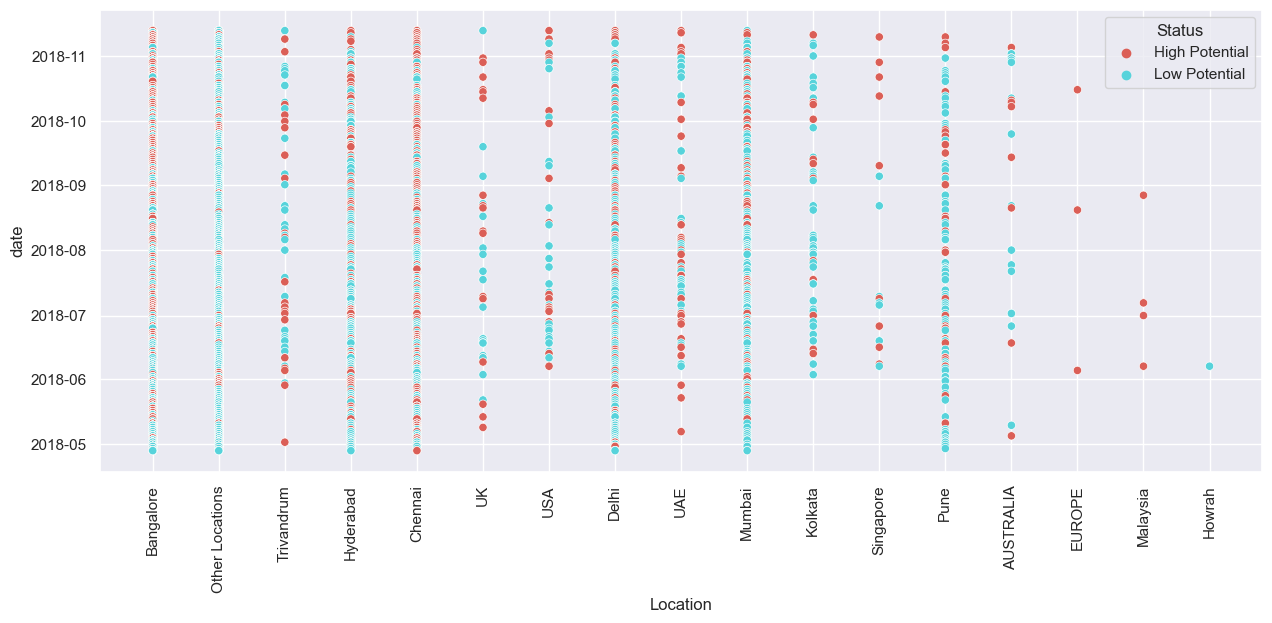

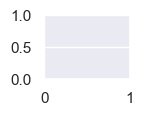

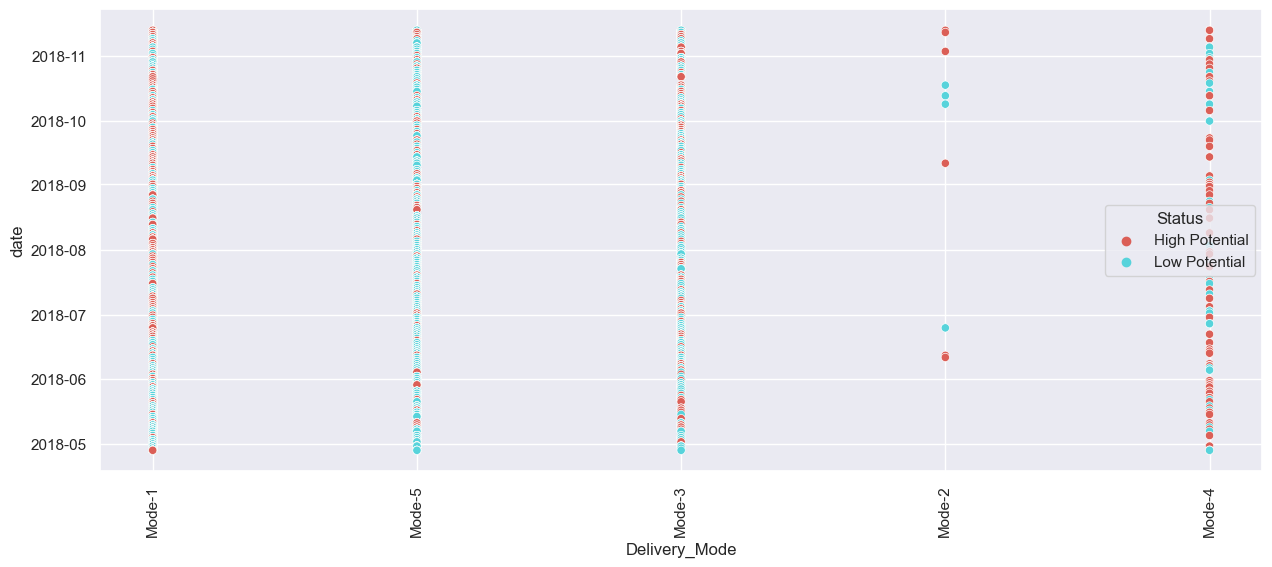

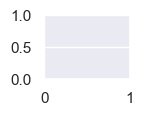

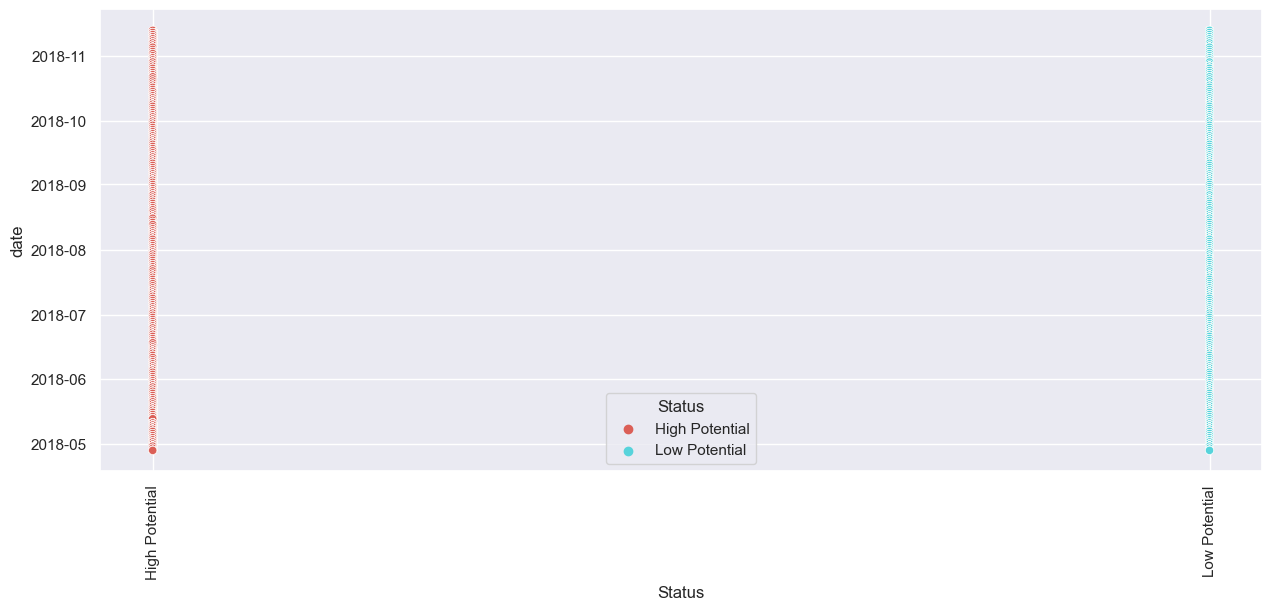

In [32]:
for i in num_var:

    for j in cat_var:
        
        if i!=j:  
        
            plt.subplot(5,5,plotnumber)

            plt.figure(figsize=(15,6))

            sns.scatterplot(x=df[j],y=df[i],data=df,hue='Status',palette='hls',color='green')

            plt.xticks(rotation=90)
            
            plt.show()

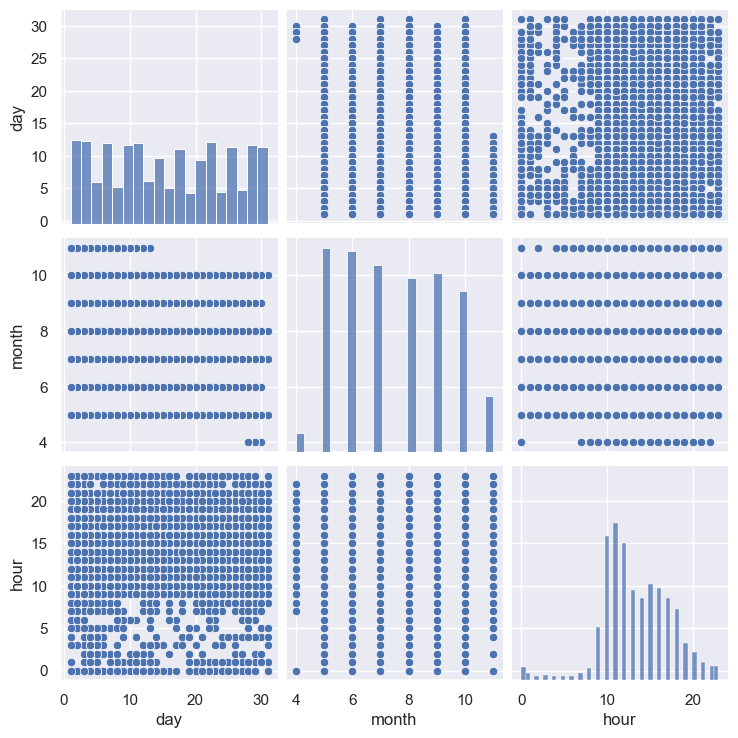

In [33]:
sns.pairplot(df,palette=None)

In [34]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,High Potential,13,11,18,2018-11-13
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential,13,11,18,2018-11-13
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,High Potential,13,11,17,2018-11-13
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential,13,11,16,2018-11-13
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential,13,11,16,2018-11-13


In [35]:
df[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Status']]=df[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Status']].apply(LabelEncoder().fit_transform)

In [36]:
df.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
18,28,16,4,1,0,0,13,11,18,2018-11-13
19,11,2,5,10,4,0,13,11,18,2018-11-13


In [37]:
corr=df.corr()

corr

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,day,month,hour,date
Product_ID,1.000000,0.006484,0.057508,-0.194166,-0.160355,-0.117769,0.008637,-0.035732,0.054304,-0.034632
Source,0.006484,1.000000,-0.024764,0.077705,-0.129967,0.056484,-0.034460,0.017784,0.119512,0.012421
Sales_Agent,0.057508,-0.024764,1.000000,-0.127033,-0.221969,-0.135721,-0.006160,0.114910,-0.024949,0.115071
Location,-0.194166,0.077705,-0.127033,1.000000,0.383444,0.299718,-0.017691,0.061214,-0.077081,0.058882
Delivery_Mode,-0.160355,-0.129967,-0.221969,0.383444,1.000000,0.205808,0.043972,0.124536,-0.099000,0.132294
Status,-0.117769,0.056484,-0.135721,0.299718,0.205808,1.000000,-0.016061,-0.099710,-0.049559,-0.103325
day,0.008637,-0.034460,-0.006160,-0.017691,0.043972,-0.016061,1.000000,-0.136735,-0.000743,0.021632
month,-0.035732,0.017784,0.114910,0.061214,0.124536,-0.099710,-0.136735,1.000000,-0.042353,0.987407
hour,0.054304,0.119512,-0.024949,-0.077081,-0.099000,-0.049559,-0.000743,-0.042353,1.000000,-0.042944
date,-0.034632,0.012421,0.115071,0.058882,0.132294,-0.103325,0.021632,0.987407,-0.042944,1.000000


<Axes: >

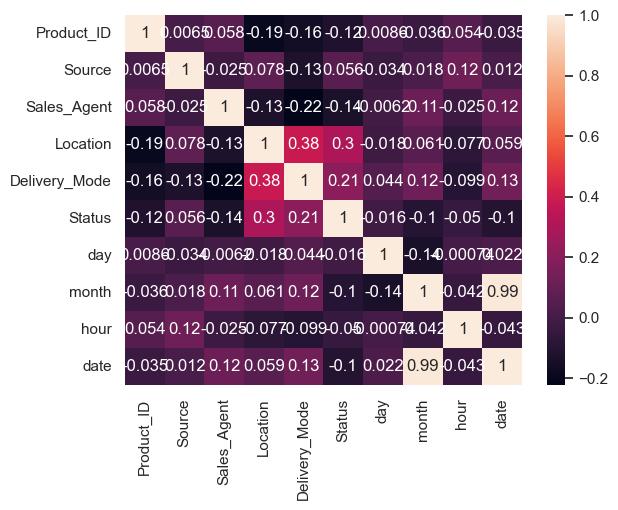

In [38]:
sns.heatmap(corr,annot=True)

In [39]:
x=df[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','day','month']]

In [40]:
x.dtypes

Product_ID       int32
Source           int32
Sales_Agent      int32
Location         int32
Delivery_Mode    int32
day              int32
month            int32
dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x=sc.fit_transform(x)

In [42]:
y=df['Status']

In [43]:
y.head()

18    0
19    0
24    0
25    1
26    0
Name: Status, dtype: int32

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(5007, 7) (2147, 7) (5007,) (2147,)


In [45]:
logistic_regression_model=LogisticRegression()

logistic_regression_model.fit(X_train,y_train)

logistic_regression_prediction=logistic_regression_model.predict(X_test)

In [47]:
logistic_regression_accuracy=accuracy_score(y_test,logistic_regression_prediction)

print("Accuracy Score :",logistic_regression_accuracy)

logistic_regression_precision_score=precision_score(y_test,logistic_regression_prediction)

print("\nPrecision Score  :",logistic_regression_precision_score)


logistic_regression_f1_score=f1_score(y_test,logistic_regression_prediction)

print("\nF1  Score  :",logistic_regression_f1_score)

logistic_regression_recall_score=recall_score(y_test,logistic_regression_prediction)

print("\nRecall  Score  :",logistic_regression_recall_score)

Accuracy Score : 0.6674429436422916

Precision Score  : 0.6975308641975309

F1  Score  : 0.7401746724890829

Recall  Score  : 0.7883720930232558


In [50]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)

print("\nBest Hyperparameters:", best_params)

print("\nTest Accuracy:", test_score)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}

Test Accuracy: 0.6674429436422916


In [51]:
knn_mdl=KNeighborsClassifier()

knn_mdl.fit(X_train,y_train)

knn_pred=knn_mdl.predict(X_test)

In [53]:
knn_acry=accuracy_score(y_test,knn_pred)

print("Accuracy Score :",knn_acry)

Accuracy Score : 0.6623195156031673


In [54]:
knn_prsc=precision_score(y_test,knn_pred)

print("\nPrecision Score  :",knn_prsc)


Precision Score  : 0.7042660882140275


In [55]:
knn_f1_sc=f1_score(y_test,knn_pred)

print("\nF1  Score  :",knn_f1_sc)


F1  Score  : 0.7287691732136176


In [56]:
knn_re_sc=recall_score(y_test,knn_pred)

print("\nRecall  Score  :",knn_re_sc)


Recall  Score  : 0.7550387596899225


In [59]:
svm_mdl=SVC()

svm_mdl.fit(X_train,y_train)

svm_pred=svm_mdl.predict(X_test)

In [61]:
svm_acry=accuracy_score(y_test,svm_pred)

print("Accuracy Score :",svm_acry)

Accuracy Score : 0.6753609687936656


In [62]:
svm_prsc=precision_score(y_test,svm_pred)

print("\nPrecision Score  :",svm_prsc)


Precision Score  : 0.6999325691166555


In [63]:
svm_f1_sc=f1_score(y_test,svm_pred)

print("\nF1  Score  :",svm_f1_sc)



F1  Score  : 0.7486476739992788


In [64]:
svm_re_sc=recall_score(y_test,svm_pred)

print("\nRecall  Score  :",svm_re_sc)



Recall  Score  : 0.8046511627906977


In [67]:
dt_mdl=DecisionTreeClassifier()

dt_mdl.fit(X_train,y_train)

dt_pred=dt_mdl.predict(X_test)

In [69]:
dt_acry=accuracy_score(y_test,dt_pred)

print("Accuracy Score :",dt_acry)

Accuracy Score : 0.6534699580810434


In [70]:
dt_prsc=precision_score(y_test,dt_pred)

print("\nPrecision Score  :",dt_prsc)



Precision Score  : 0.7170111287758346


In [71]:
dt_f1_sc=f1_score(y_test,dt_pred)

print("\nF1  Score  :",dt_f1_sc)


F1  Score  : 0.7080062794348507


In [72]:
dt_re_sc=recall_score(y_test,dt_pred)

print("\nRecall  Score  :",dt_re_sc)



Recall  Score  : 0.6992248062015504


In [75]:
rf_mdl=RandomForestClassifier()

rf_mdl.fit(X_train,y_train)

rf_pred=rf_mdl.predict(X_test)

In [77]:
rf_acry=accuracy_score(y_test,rf_pred)

print("Accuracy Score :",rf_acry)

Accuracy Score : 0.695854680950163


In [78]:
rf_prsc=precision_score(y_test,rf_pred)

print("\nPrecision Score  :",rf_prsc)


Precision Score  : 0.7361008154188288


In [79]:
rf_f1_sc=f1_score(y_test,rf_pred)

print("\nF1  Score  :",rf_f1_sc)


F1  Score  : 0.7525577870405457


In [80]:
rf_re_sc=recall_score(y_test,rf_pred)

print("\nRecall  Score  :",rf_re_sc)



Recall  Score  : 0.7697674418604651


In [83]:
gb_mdl=GradientBoostingClassifier()

gb_mdl.fit(X_train,y_train)

gb_pred=svm_mdl.predict(X_test)

In [85]:
gb_acry=accuracy_score(y_test,gb_pred)

print("Accuracy Score :",gb_acry)

Accuracy Score : 0.6753609687936656


In [86]:
gb_prsc=precision_score(y_test,gb_pred)

print("\nPrecision Score  :",gb_prsc)


Precision Score  : 0.6999325691166555


In [87]:
gb_f1_sc=f1_score(y_test,gb_pred)

print("\nF1  Score  :",gb_f1_sc)



F1  Score  : 0.7486476739992788


In [88]:
gb_re_sc=recall_score(y_test,gb_pred)

print("\nRecall  Score  :",gb_re_sc)


Recall  Score  : 0.8046511627906977


In [91]:
from sklearn.ensemble import BaggingClassifier

bgc_mdl=BaggingClassifier()

bgc_mdl.fit(X_train,y_train)

bgc_pred=bgc_mdl.predict(X_test)

In [93]:
bgc_acry=accuracy_score(y_test,bgc_pred)

print("Accuracy Score :",bgc_acry)

Accuracy Score : 0.6641825803446669


In [94]:
bgc_prsc=precision_score(y_test,bgc_pred)

print("\nPrecision Score  :",bgc_prsc)


Precision Score  : 0.7277822257806245


In [95]:
bgc_f1_sc=f1_score(y_test,bgc_pred)

print("\nF1  Score  :",bgc_f1_sc)



F1  Score  : 0.7160299330445057


In [96]:
bgc_re_sc=recall_score(y_test,bgc_pred)

print("\nRecall  Score  :",bgc_re_sc)


Recall  Score  : 0.7046511627906977


In [99]:
nb_mdl=GaussianNB()

nb_mdl.fit(X_train,y_train)

nb_pred=nb_mdl.predict(X_test)

In [101]:
nb_acry=accuracy_score(y_test,nb_pred)

print("Accuracy Score :",nb_acry)

Accuracy Score : 0.6618537494177923


In [102]:
nb_prsc=precision_score(y_test,nb_pred)

print("\nPrecision Score  :",nb_prsc)


Precision Score  : 0.7088888888888889


In [103]:
nb_f1_sc=f1_score(y_test,nb_pred)

print("\nF1  Score  :",nb_f1_sc)


F1  Score  : 0.7250000000000002


In [104]:
nb_re_sc=recall_score(y_test,nb_pred)

print("\nRecall  Score  :",nb_re_sc)


Recall  Score  : 0.7418604651162791


In [107]:
cat_features = list(range(0, x.shape[1]))

print(cat_features)

[0, 1, 2, 3, 4, 5, 6]


In [108]:
cbc_mdl =CatBoostClassifier()

params = {'learning_rate': 0.1, 'depth': 6,'l2_leaf_reg': 3, 'iterations': 100} 

cat_mdl = CatBoostClassifier(**params) 

cat_mdl.fit(X_train, y_train)

cat_pred=nb_mdl.predict(X_test)

0:	learn: 0.6745471	total: 167ms	remaining: 16.5s
1:	learn: 0.6573615	total: 174ms	remaining: 8.51s
2:	learn: 0.6435635	total: 180ms	remaining: 5.83s
3:	learn: 0.6325996	total: 187ms	remaining: 4.49s
4:	learn: 0.6227797	total: 194ms	remaining: 3.68s
5:	learn: 0.6142720	total: 200ms	remaining: 3.14s
6:	learn: 0.6059233	total: 207ms	remaining: 2.75s
7:	learn: 0.5995398	total: 213ms	remaining: 2.45s
8:	learn: 0.5938563	total: 220ms	remaining: 2.22s
9:	learn: 0.5885098	total: 227ms	remaining: 2.04s
10:	learn: 0.5833860	total: 235ms	remaining: 1.9s
11:	learn: 0.5795325	total: 241ms	remaining: 1.77s
12:	learn: 0.5758806	total: 248ms	remaining: 1.66s
13:	learn: 0.5718418	total: 255ms	remaining: 1.57s
14:	learn: 0.5684126	total: 262ms	remaining: 1.49s
15:	learn: 0.5655399	total: 269ms	remaining: 1.41s
16:	learn: 0.5627584	total: 273ms	remaining: 1.33s
17:	learn: 0.5606712	total: 277ms	remaining: 1.26s
18:	learn: 0.5585328	total: 281ms	remaining: 1.2s
19:	learn: 0.5566820	total: 284ms	remaining

In [109]:
cat_accuracy=accuracy_score(y_test,cat_pred)

print("Accuracy Score:",cat_accuracy)

Accuracy Score: 0.6618537494177923


In [110]:
cat_prs=precision_score(y_test,cat_pred)

cat_prs

0.7088888888888889

In [111]:
cat_r_sc=recall_score(y_test,cat_pred)

cat_r_sc

0.7418604651162791

In [112]:
cat_f1_sc=f1_score(y_test,cat_pred)

cat_f1_sc

0.7250000000000002

In [115]:
xg_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

xg_model.fit(X_train, y_train)

xg_pred = xg_model.predict(X_test)

In [116]:
xg_acry=accuracy_score(y_test,xg_pred)

print("Accuracy Score :", xg_acry)

Accuracy Score : 0.7056357708430367


In [117]:
xg_prsc=precision_score(y_test, xg_pred)

print("\nPrecision Score  :",xg_prsc)


Precision Score  : 0.7310393258426966


In [118]:
xg_f1_sc=f1_score(y_test, xg_pred)

print("\nF1  Score  :",xg_f1_sc)


F1  Score  : 0.7671333824613117


In [119]:
xg_re_sc=recall_score(y_test,xg_pred)

print("\nRecall  Score  :",xg_re_sc)


Recall  Score  : 0.8069767441860465


In [122]:
xg=xg_acry
        
logistic=logistic_regression_accuracy
          
KNN=knn_acry
          
svm=svm_acry
          
decision_Tree=dt_acry
          
random_forest=rf_acry
          
gradient_boost=gb_acry
        
bagging=bgc_acry
          
navie_bayes=nb_acry

In [123]:
acs_sc =[ xg, logistic, KNN, svm, decision_Tree, random_forest, gradient_boost,bagging,navie_bayes]

accuracy_score = [int(num * 100) for num in acs_sc]

algorithms=['XGBoost','LinearRegression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting','Bagging','NavieBayes']

for i in range(len(algorithms)):
    
    print('\n'+algorithms[i] + " Accuracy Score  "+' is: ' + str(accuracy_score[i])+" "+"%")


XGBoost Accuracy Score   is: 70 %

LinearRegression Accuracy Score   is: 66 %

KNN Accuracy Score   is: 66 %

SVM Accuracy Score   is: 67 %

DecisionTree Accuracy Score   is: 65 %

RandomForest Accuracy Score   is: 69 %

GradientBoosting Accuracy Score   is: 67 %

Bagging Accuracy Score   is: 66 %

NavieBayes Accuracy Score   is: 66 %


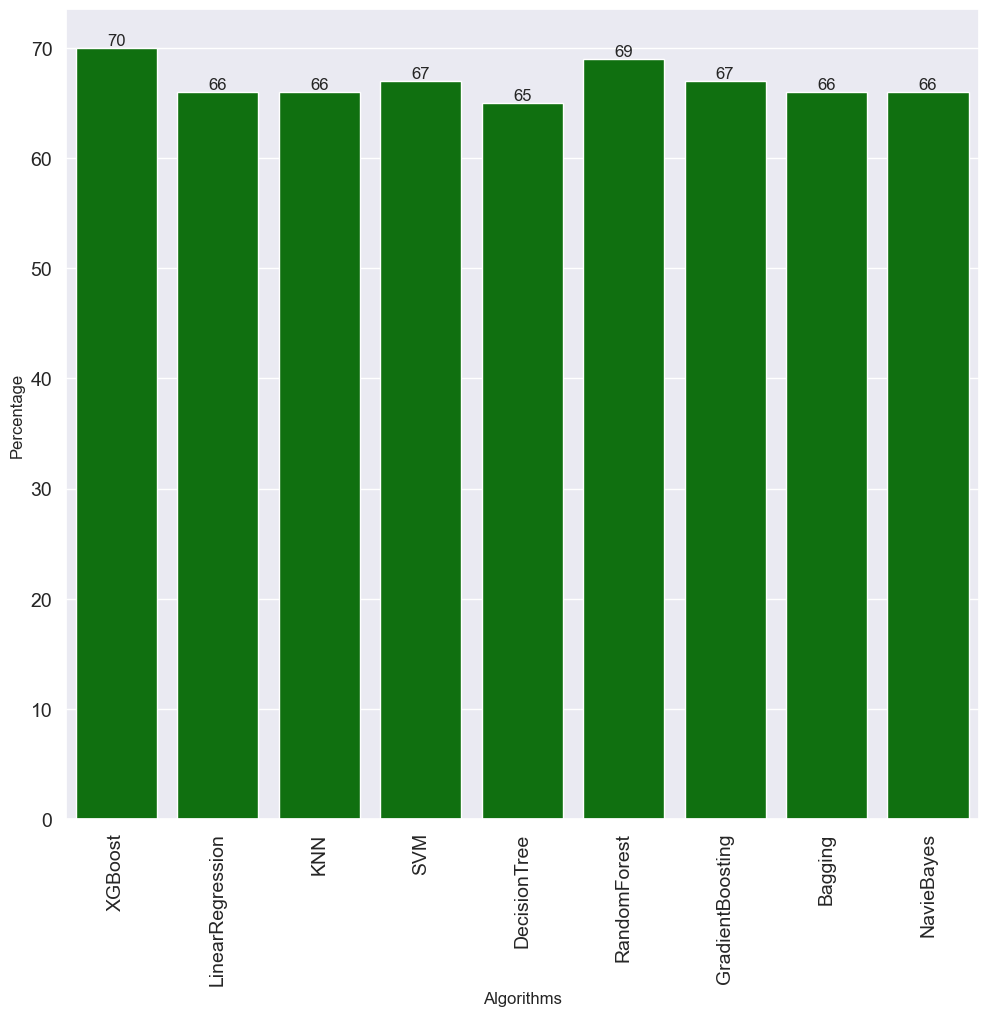

In [124]:
plt.figure(figsize=(10,10))

plt.xlabel("Algorithms")

plt.ylabel("Percentage")

ax=sns.barplot(x=algorithms, y=accuracy_score,color='green')

for label in ax.containers:
    
    ax.bar_label(label)
    
    plt.xticks(rotation=90)
    
plt.tight_layout()

plt.tick_params(labelsize=14)

# Best Model 

    * XG Boost Model : 70 % 